In [1]:
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

set_nb_theme('chesterish')

In [2]:
#load libraries 
import time,os
from matplotlib.offsetbox import AnchoredText
import sys,pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines, numpy as np, math, pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#import cudf
#import ROOT
#from ROOT import TFile

#import root_pandas

#from toggle_cell import hide_cell 
import uproot3
%matplotlib inline

#presets for plot style
from scipy.constants import golden
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 7/golden),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

viridis = cm.get_cmap('viridis', 12)
inferno = cm.get_cmap('inferno', 12)
autumn = cm.get_cmap('autumn', 12)

#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)
#tf.config.experimental.set_memory_growth(physical_devices[1], True)
rc = plt.rc
rc('text', usetex=False)
import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=False)
rc('font', size=15)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

import root_pandas,glob

import gc

import uproot
def read_n(pattern, n):
    if not '*' in pattern:
        a = root_pandas.read_root(pattern,chunksize=int(n))
    else:
        a = root_pandas.read_root(glob.glob(pattern),chunksize=int(n))
    for b in a:
        del a
        print(n)
        return b

from scipy.optimize import curve_fit

image_dir='images'

import misc_util#correlation_plots

import R2h_module
import imp
imp.reload(R2h_module)

import mplhep as hep
hep.style.use("CMS")

/home/sebouh/.local/lib/python3.8/site-packages/uproot3/__init__.py:127: FutureWarning: Consider switching from 'uproot3' to 'uproot', since the new interface became the default in 2020.

    pip install -U uproot

In Python:

    >>> import uproot
    >>> with uproot.open(...) as file:
    ...

  warnings.warn(
/home/sebouh/.local/lib/python3.8/site-packages/awkward0/__init__.py:12: FutureWarning: Consider switching from 'awkward0' to 'awkward', since the new interface became the default in 2020.

    pip install -U awkward

In Python:

    >>> import awkward as ak
    >>> new_style_array = ak.from_awkward0(old_style_array)
    >>> old_style_array = ak.to_awkward0(new_style_array)

  warnings.warn(


In [3]:
dfs_mixed={}

In [4]:
mixtag='xQ2_originalK_'
a='D_C'
dfs_mixed['xQ2_originalK']=root_pandas.read_root(f"/data/sebouh/eg2/python/mixed_xQ2_originalK_{a}.root")
dfs_mixed['xQ2']=root_pandas.read_root(f"/data/sebouh/eg2/python/mixed_xQ2_{a}.root")



In [616]:
dfs_mixed['no_ecuts_originalK']=\
    root_pandas.read_root(f"/data/sebouh/eg2/python/mixed_no_ecuts_originalK_D.root")

In [16]:
dfs_mixed['no_ecuts_originalPT']=\
    root_pandas.read_root(f"/data/sebouh/eg2/python/mixed_no_ecuts_originalPT_D.root")

In [617]:
dfs_mixed['no_ecuts_originalK_zfix']=\
    root_pandas.read_root(f"/data/sebouh/eg2/python/mixed_no_ecuts_originalK_zfix_D.root")

In [11]:
dfs_mixed['no_ecuts']=\
    root_pandas.read_root(f"/data/sebouh/eg2/python/mixed_no_ecuts_D.root")



In [619]:
dfs_mixed['angle_cut_15deg']=\
    root_pandas.read_root(f"/data/sebouh/eg2/python/mixed_angle_cut_15deg_D.root")

In [620]:
dfs_mixed['angle_cut_5deg']=\
    root_pandas.read_root(f"/data/sebouh/eg2/python/mixed_angle_cut_5deg_D.root")

In [621]:
#sets =  "D_C C D_Fe Fe Pb D_Pb".split()
#sets += "MC_D2 MC_C MC_Fe MC_Pb".split()
#sets += "no_ecuts_D_C no_ecuts_C no_ecuts_D_Fe no_ecuts_Fe no_ecuts_Pb no_ecuts_D_Pb".split()
#sets += "xQ2_D_C xQ2_C xQ2_D_Fe xQ2_Fe xQ2_Pb xQ2_D_Pb".split()

#dfs_mixed = {a : root_pandas.read_root("../../eg2/python/mixed_%s.root"%a)  for a in sets}

#mixtag=['no_ecuts_originalK_']
#a='D'
#dfs_mixed = {mixtag : root_pandas.read_root(f"/data/sebouh/eg2/python/mixed_{mixtag}{a}.root")  for mixtag in "D".split()}
#dfs_mixed = {a : root_pandas.read_root(f"/home/sebouh/eg2/python/mixed_{mixtag}{a}.root")  for a in "D_C C D_Fe Fe Pb D_Pb".split()}

In [622]:
dfs_mixed['xQ2_originalK'].eval("sqrt(h2_px*h2_px+h2_py*h2_py+h2_pz*h2_pz)-h2_p")


entry
0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
3403321    0.0
3403322    0.0
3403323    0.0
3403324    0.0
3403325    0.0
Length: 3403326, dtype: float64

In [17]:
import R2h_module
import imp
imp.reload(R2h_module)
R2h_module.maxzmass = 9999
R2h_module.minzmass = 0
R2h_module.maxdphi=9999
for key in list(dfs_mixed.keys()):
    isMC=False
    if 'GiBUU' in key:
        isMC=True
    dfs_mixed[key].rename(columns={'h1_FidCut':'h1_FidCutPiPlus'}, inplace=True)
    dfs_mixed[key].rename(columns={'h2_FidCut':'h2_FidCutPiPlus'}, inplace=True)
    
    print(f"\n\n{key}")
    if  'dphi' not in dfs_mixed[key].columns:
        dfs_mixed[key].eval('diff_phi_cm = h1_cm_ph-h2_cm_ph', inplace=True)
        dfs_mixed[key].eval(f'diff_phi_cm = diff_phi_cm-{2*np.pi}*(diff_phi_cm>{np.pi})', inplace=True)
        dfs_mixed[key].eval(f'diff_phi_cm = diff_phi_cm+{2*np.pi}*(diff_phi_cm<{-np.pi})', inplace=True)
        dfs_mixed[key].eval(f'dphi = abs(diff_phi_cm)', inplace=True)
    dfs_mixed[key].eval('h1_e=nu*h1_z',inplace=True)
    dfs_mixed[key].eval('h2_e=nu*h2_z',inplace=True)
    dfs_mixed[key].eval(f'drap=0.5*log((h1_e+sqrt(h1_p**2-h1_cm_pt**2))/(h1_e-sqrt(h1_p**2-h1_cm_pt**2)))-0.5*log((h2_e+sqrt(h2_p**2-h2_cm_pt**2))/(h2_e-sqrt(h2_p**2-h2_cm_pt**2)))',inplace=True)

    mixed_trigger_cuts = R2h_module.applyCuts(dfs_mixed[key], nomCuts=True)    
    dfs_mixed[key] = R2h_module.applyCutsPair(mixed_trigger_cuts,isMC=isMC,
                                                             nomCuts=True,h2Proton=False)
    
    #for df in (dfs_data[key + '_2pi'],dfs_data[key + '_pi_p']):
    #    df.eval('diff_rap_cm=0.5*log((h1_e+sqrt(h1_p**2-h1_cm_pt**2))/(h1_e-sqrt(h1_p**2-h1_cm_pt**2)))-0.5*log((h2_e+sqrt(h2_p**2-h2_cm_pt**2))/(h2_e-sqrt(h2_p**2-h2_cm_pt**2)))',inplace=True)
    #    df.eval('diff_phi_cm = h1_cm_ph-h2_cm_ph', inplace=True)
    #    df.eval(f'diff_phi_cm = diff_phi_cm-{2*np.pi}*(diff_phi_cm>{np.pi})', inplace=True)
    #    df.eval(f'diff_phi_cm = diff_phi_cm+{2*np.pi}*(diff_phi_cm<{-np.pi})', inplace=True)



xQ2_originalK
Entries before cut  351976
Q2>1.0 and Q2<4.0 351976  (100.00  %)
0.2<h1_p<5.0  351976  (100.00  %)
inelasticity < 0.85 351976  (100.00  %)
h1_pid = pions (trigger) 351976  (100.00  %)
2.2 < nu <4.2 351976  (100.00  %)
10< h1_th 351976  (100.00  %)
Theta/P fiducial region selected for trigger hadron 351976  (100.00  %)
Nom cuts for the trigger applied 351976  (100.00  %)
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 351976  (100.00  %)
2.2 < nu < 4.2 351976  (100.00  %)
secondary hadrons are pions 351976  (100.00  %)
(h1_pid*h2_pid)<0, opposite charge pions 351976  (100.00  %)
kinematic limits for h2_z 351976  (100.00  %)
kinematic limits for dphi 351976  (100.00  %)
kinematic limits for pair_mass 351976  (100.00  %)
leading hadrons are pions 351976  (100.00  %)
0.2<h2_p<5.0 351976  (100.00  %)
0.2<h1_p<5.0 351976  (100.00  %)
10<h2_th 351976  (100.00  %)
Theta/P fiducial region selected for secondary hadron 351976  (100.00  %)
10< h1_th 351976  (100.00

In [6]:
dfs_mc={}

dfs_mc['D'] =  root_pandas.read_root("/home/sebouh/CreatePairTuples/MC_Pairs_weighted_D.root","D")

In [7]:
dfs_mc['D_unprocessed'] =  root_pandas.read_root("MC_Pairs_D_no_h2_kin_cuts.root","D")

(array([2.6000e+01, 1.0700e+02, 3.4900e+02, 7.6200e+02, 1.5590e+03,
        2.0120e+03, 2.9640e+03, 3.6590e+03, 4.6790e+03, 5.9400e+03,
        6.6600e+03, 7.6960e+03, 8.7960e+03, 9.7580e+03, 1.0439e+04,
        1.1710e+04, 1.2813e+04, 1.3216e+04, 1.4261e+04, 1.5096e+04,
        1.5888e+04, 1.6906e+04, 1.7858e+04, 1.8317e+04, 1.9253e+04,
        2.0050e+04, 2.0672e+04, 2.1729e+04, 2.1909e+04, 2.2684e+04,
        2.3210e+04, 2.4161e+04, 2.4511e+04, 2.5546e+04, 2.5959e+04,
        2.6124e+04, 2.6880e+04, 2.7085e+04, 2.7703e+04, 2.7752e+04,
        2.8571e+04, 2.8734e+04, 2.8943e+04, 2.9768e+04, 2.9760e+04,
        3.0702e+04, 3.0923e+04, 3.0964e+04, 3.0951e+04, 3.1286e+04,
        3.1487e+04, 3.2007e+04, 3.2051e+04, 3.2555e+04, 3.2841e+04,
        3.2566e+04, 3.2976e+04, 3.3064e+04, 3.3711e+04, 3.3590e+04,
        3.4259e+04, 3.4247e+04, 3.4545e+04, 3.4694e+04, 3.4381e+04,
        3.4655e+04, 3.5208e+04, 3.4975e+04, 3.4668e+04, 3.5294e+04,
        3.5031e+04, 3.5191e+04, 3.5473e+04, 3.56

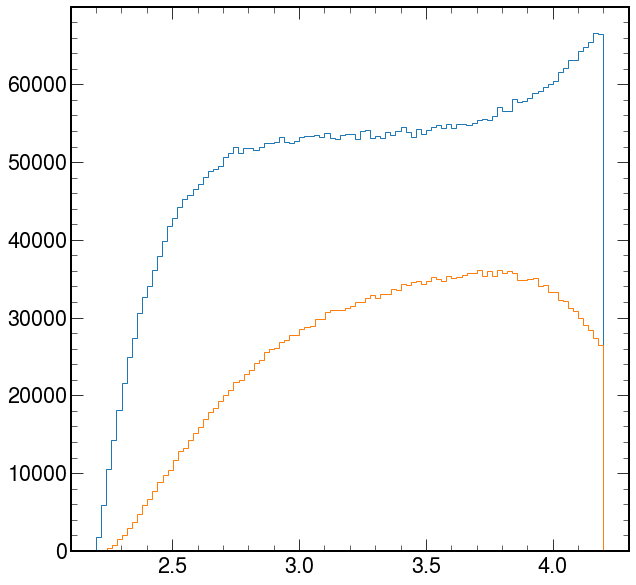

In [754]:
plt.hist(dfs_mc['D_unprocessed'].query("Q2<0")['nu_truth'],bins=100, histtype='step')
plt.hist(dfs_mc['D_unprocessed'].query("Q2>0")['nu_truth'],bins=100, histtype='step')
#plt.hist(dfs_mc['D_unprocessed'].query("Q2>0")['Q2_truth'])

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+01, 2.8150e+03, 7.5730e+03, 1.2046e+04, 1.5817e+04,
        1.8919e+04, 2.1347e+04, 2.3215e+04, 2.4753e+04, 2.5425e+04,
        2.6679e+04, 2.5843e+04, 2.5701e+04, 2.5416e+04, 2.3445e+04,
        2.3117e+04, 2.1855e+04, 2.1107e+04, 2.0578e+04, 1.9067e+04,
        1.8291e+04, 1.7023e+04, 1.5487e+04, 1.4180e+04, 1.3093e+04,
        1.1958e+04, 1.0854e+04, 9.8980e+03, 8.7750e+03, 8.1630e+03,
        7.5800e+03, 6.7060e+03, 5.6030e+03, 4.7620e+03, 4.2740e+03,
        3.6100e+03, 2.8950e+03, 2.6460e+03, 2.7110e+03, 2.6570e+03,
        2.5650e+03, 2.3510e+03, 2.1700e+03, 1.8850e+03, 1.6580e+03,
        1.4700e+03, 1.3390e+03, 1.1270e+03, 9.9700e+02, 1.0950e+03,
        9.4400e+02, 8.7300e+02, 7.6000e+02, 6.1900e+02, 5.9300e+02,
        5.0000e+02, 4.7200e+02, 3.9600e+02, 3.4300e+02, 3.4700e+02,
        2.6400e+02, 2.5900e+02, 2.3400e+02, 1.7300e+02, 1.8500e+02,
        1.8800e+02, 1.2000e+02, 1.1700e+02, 1.15

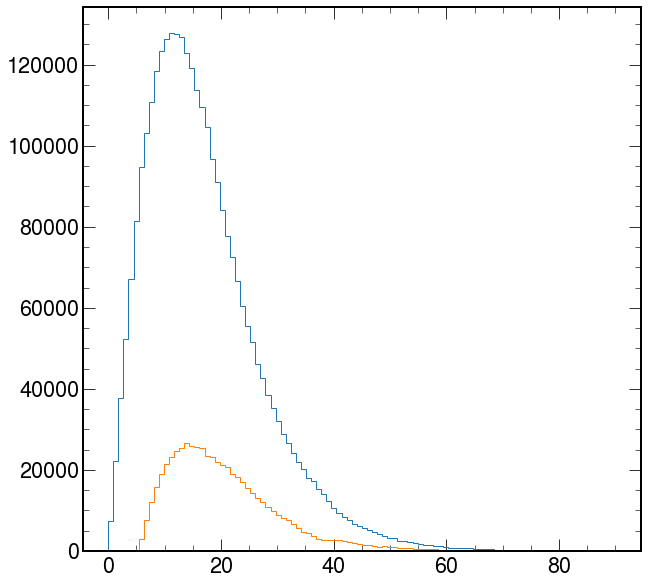

In [755]:
plt.hist(dfs_mc['D_unprocessed'].query("h1_pid<-3000 and h1_truth_pid==211").h1_truth_th, 
         bins=100, range=(0, 90), histtype='step')
plt.hist(dfs_mc['D_unprocessed'].query("h1_pid>-3000 and h1_truth_pid==211").h1_truth_th, 
         bins=100, range=(0, 90),
        histtype='step')

(array([6596395.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,  341059.,       0.,       0.,  631192.,
              0.,       0.,       0.,       0., 

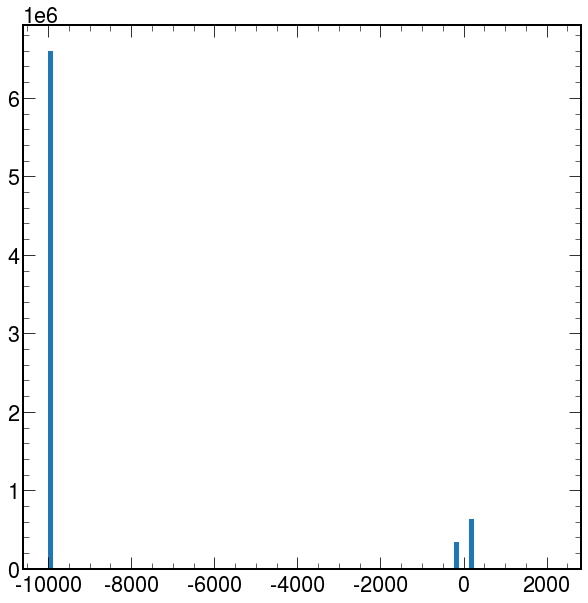

In [756]:
plt.hist(dfs_mc['D_unprocessed'].h1_pid,bins=100)

no_ecuts_originalPT  mixing RMS= 0.062376363237153495
rms= 0.035877867560928894 chi2= 88.55078921051583


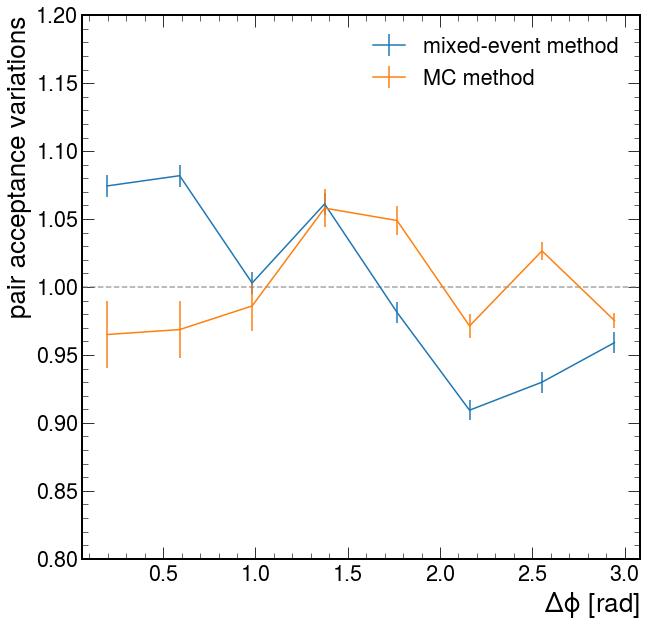

In [31]:
pid=211;  pMin=0.35; pT1min=0.25; pT2min=0.25;bins=8
q = f"h1_pid=={pid}  and h2_z>0.05 and h2_z<0.45 and h1_cm_pt > {pT1min}"
q += f" and h2_cm_pt > {pT2min} and h1_z>0.5 and h2_pid=={-pid} and h2_p>{pMin}"
q +=     " and h1_z>0.5"
q +=" and ((h2_th>25 and h2_p>0.7) or (h2_p>0.5 and h2_th>30) or (h2_th>40)) and h1_th>10 "


for key in "no_ecuts_originalPT",:
    df = dfs_mixed[key].query(q)
    N2mix, x = np.histogram(df['dphi'], bins=bins, range=(0, np.pi))
    phi=(x[:-1]+x[1:])/2
    M = N2mix/(sum(N2mix)/len(N2mix))
    dMstat = np.sqrt(N2mix)/(sum(N2mix)/len(N2mix))
    plt.errorbar(phi,M, dMstat, label="mixed-event method")
                 #label="mix: " +key)
    print(key, " mixing RMS=", np.sqrt(np.sum((M-1)**2)/(len(M))))

for i,df in enumerate((dfs_mc['D'],)):
    for weighted in  [True]:
        if max(df['h1_th'])<np.pi:
            df['h1_th'] = df['h1_th']*180/np.pi
        df['h2_truth_p']=df.eval("sqrt((nu_truth*h2_truth_z)**2-.1396**2)")
        df['h1_truth_p']=df.eval("sqrt((nu_truth*h1_truth_z)**2-.1396**2)")
        df['inelasticity']=df.eval("nu/5.0")
        cuts = f"h1_truth_cm_pt>{pT1min}"
        cuts += f" and h2_truth_cm_pt>{pT2min} and h2_truth_p>0.35"
        cuts += " and h1_truth_z>0.5 and h2_truth_z>0.05 and h2_truth_z<0.45"
        cuts += " and h1_truth_pid==211 and h2_truth_cm_pt< 99 and h1_truth_th>10"
        cuts += " and h2_truth_pid==-211"
        cuts += " and ((h2_truth_th>25 and h2_truth_p>0.7) or (h2_truth_p>0.5 & h2_truth_th>30) or (h2_truth_th>40))"
        cuts += " and Q2_truth>1.0 and Q2_truth<4.0 and nu_truth/5.014<0.85 and nu_truth>2.2 and nu_truth<4.2 and sqrt(.9383**2+nu_truth*.9383*2-Q2_truth)>2"
        if "h1_p" not in df.columns:
            df['h1_p'] =df.eval("sqrt((nu*h1_z)**2-.1396**2)")
        if "h2_p" not in df.columns:
            df['h2_p'] =df.eval("sqrt((nu*h2_z)**2-.1396**2)")

        #df.rename(columns={'h1_FidCut':'h1_FidCutPiPlus'}, inplace=True)
        #df.rename(columns={'h2_FidCut':'h2_FidCutPiPlus'}, inplace=True)

        #apply trigger cuts.
        df= df.query(cuts)#R2h_module.applyCuts(df.query(cuts), nomCuts=True)
        

        denom,x = np.histogram(df.eval("abs(dphi_truth)"), bins=np.linspace(0, np.pi, 9), weights=df.weight_truth if weighted else None)

        q_pass = "h2_pid==-211 and h2_z>0.05 and abs(h2_deltaZ)<3 and h2_FidCutPiPlus==1 and h2_cm_pt<99"
        q_pass += " and abs(h2_th-h2_truth_th)<5 and abs(h1_th-h1_truth_th)<5 and h1_z>0.5"
        q_pass += " and Q2>1 and (Q2-Q2_truth)/Q2_truth<.1 and TargType!=0 "
        
        dfpass = df.query(q_pass)
        num,x = np.histogram(dfpass.eval("abs(dphi_truth)"), bins=np.linspace(0, np.pi, 9), weights=dfpass.weight_truth if weighted else None)
        eff=num/denom
        deff=np.sqrt((num)*(denom-num)/(denom**3))
        x=(x[:-1]+x[1:])/2
        y=eff/np.mean(eff)
        dy = deff/np.mean(eff)
        #print(y, dy)
        rms = np.sqrt(sum((y-1)**2)/len(y))
        print("rms=",rms, "chi2=", sum((y-1)**2/(dy**2)))
        plt.errorbar(x,y, dy, label="MC method")
                     #label='MC '+ ("weighted" if weighted else "unweighted"))    

plt.legend()
plt.xlabel("$\Delta\phi$ [rad]")
plt.ylabel("pair acceptance variations")
plt.axhline(1, linestyle='--', color='0.5', alpha=0.7)
plt.ylim(.8, 1.2)
plt.savefig("/home/sebouh/Documents/Overleaf_git/Dihadron2D_AN/figures/systematics/efficiency_syst.png")

(array([156., 190., 190., 235., 239., 233., 230., 229., 240., 259., 236.,
        267., 259., 247., 230., 220., 238., 214., 186., 192., 155., 195.,
        176., 190., 163., 154., 138., 158., 153., 127., 144., 120., 124.,
        118., 111., 128.,  87.,  84.,  81.,  80.,  78.,  87.,  95., 103.,
        112.,  64.,  68.,  53.,  53.,  53.,  57.,  55.,  42.,  59.,  47.,
         53.,  47.,  60.,  37.,  39.,  38.,  42.,  36.,  44.,  22.,  30.,
         32.,  18.,  18.,  15.,  16.,  12.,  20.,  20.,  22.,   8.,   8.,
         23.,  17.,   8.,   8.,  16.,  12.,   0.,   9.,   6.,   4.,   4.,
          6.,  12.,   6.,   6.,   6.,   4.,   4.,   0.,   0.,   1.,   5.,
          2.]),
 array([1.00328445, 1.03030951, 1.05733458, 1.08435964, 1.1113847 ,
        1.13840976, 1.16543482, 1.19245988, 1.21948494, 1.24651   ,
        1.27353506, 1.30056012, 1.32758518, 1.35461024, 1.3816353 ,
        1.40866036, 1.43568542, 1.46271049, 1.48973555, 1.51676061,
        1.54378567, 1.57081073, 1.59783579, 1.

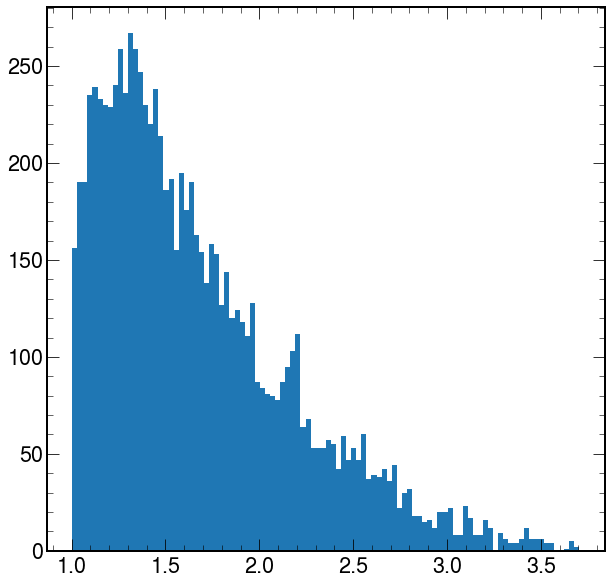

In [693]:
plt.hist(dfs_mc['D_unprocessed'].eval("Q2"),bins=100)

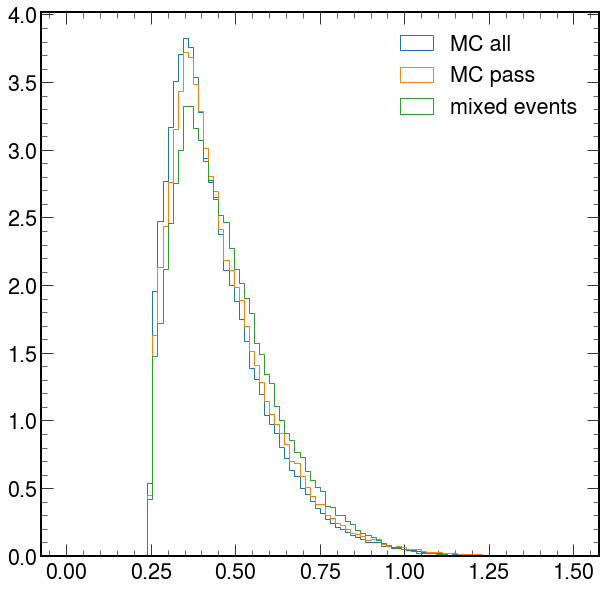

In [531]:
#plt.hist(dfs_mixed['angle_cut_5deg'].h2_cm_pt, bins=100, histtype="step", density=True,label="Mix")
df= dfs_mc['D'].query(cuts)
plt.hist(df.h2_truth_cm_pt, range=(0, 1.5), weights=df.weight_truth, bins=100, histtype="step", 
         density=True, label="MC all")
df= df.query("h2_th>0")
plt.hist(df.h2_truth_cm_pt, range=(0, 1.5), weights=df.weight_truth, bins=100, histtype="step", 
         density=True, label="MC pass")

df= dfs_mixed['no_ecuts'].query(cuts.replace("_truth", ""))
plt.hist(df.h2_cm_pt, range=(0, 1.5), bins=100, histtype="step", 
         density=True, label="mixed events")

#plt.xlabel("$p^T_2$ [GeV]")
plt.legend()
plt.show()

In [548]:
i=[1,2,3,4,5,6,7,8,9,10,11,12]
def flip(i):
    return np.concatenate([i[len(i)//4-1:0:-1],i[:1], i, i[-1:len(i)//4-1:-1]])
print(len(flip(i)))
def flipx(i):
    return np.concatenate([-1*np.array(i[len(i)//4-1:0:-1]),[-i[0]], i, np.pi*2-np.array(i[-1:len(i)//4-1:-1])])
print(len(flipx(i)))

24
24


In [ ]:
def errorbar_xrange(phi, y, dy, label=None):
    y_new = np.concat([y[0:2:-1], y, y[2:8:-1])
    plt.errorbar(phi, y, dy, )

Entries before cut  83751
Q2>1.0 and Q2<4.0 83751  (100.00  %)
0.2<h1_p<5.0  83751  (100.00  %)
inelasticity < 0.85 83751  (100.00  %)
h1_pid = pions (trigger) 83751  (100.00  %)
2.2 < nu <4.2 83751  (100.00  %)
10< h1_th 83751  (100.00  %)
Theta/P fiducial region selected for trigger hadron 83751  (100.00  %)
Nom cuts for the trigger applied 68532  (81.83  %)
[0.95630552 0.98950713 0.99100727 1.04004205 1.06072476 0.96783081
 0.99827068 0.99631177] [0.02639901 0.02241093 0.0188421  0.01482101 0.01140247 0.00929173
 0.00726202 0.00630492]
rms= 0.03248555457119027 chi2= 51.23283063925494


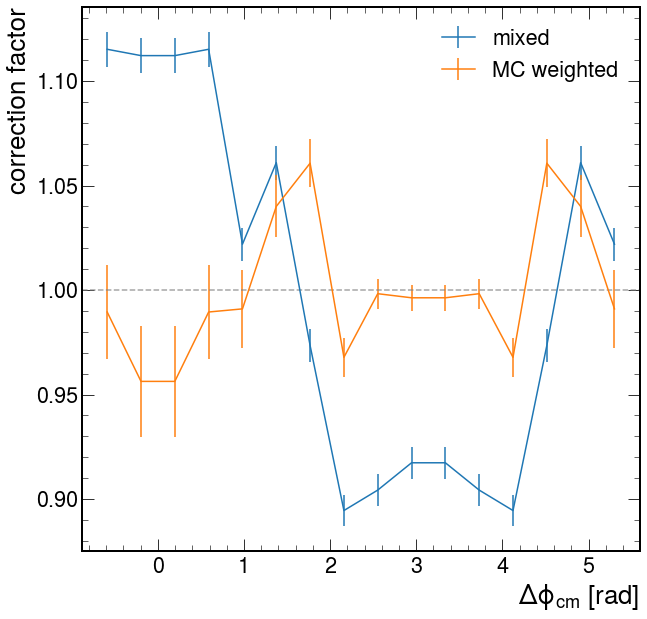

In [591]:
#only use standard mix and standard mc
pid=211;  pMin=0.35; pT1min=.25; pT2min=.25;bins=8
q = f"h1_pid=={pid}  and h2_z>0.05 and h2_z<0.45 and h1_cm_pt > {pT1min} and "+\
                 f"h2_cm_pt > {pT2min} and h1_z>0.5 and h2_pid=={-pid} and h2_p>{pMin}"
q +=     " and h2_th<90 and h1_z>0.5"
q +=" and ((h2_th>25 and h2_p>0.7) or (h2_p>0.5 and h2_th>30) or (h2_th>40)) and h1_th>10 "



for key in "no_ecuts",:
    df = dfs_mixed[key].query(q)
    N2mix, x = np.histogram(dfs_mixed[key].query(q)['dphi'], bins=bins, range=(0, np.pi))
    phi=(x[:-1]+x[1:])/2
    M = N2mix/(sum(N2mix)/len(N2mix))
    dMstat = np.sqrt(N2mix)/(sum(N2mix)/len(N2mix))
    plt.errorbar(flipx(phi),flip(M), flip(dMstat), label="mixed")

for df in dfs_mc['D'],:
    for weighted in True,:
        
        df['h2_truth_p']=df.eval("sqrt((nu_truth*h2_truth_z)**2-.1396**2)")
        df['h1_truth_p']=df.eval("sqrt((nu_truth*h1_truth_z)**2-.1396**2)")
        cuts = "h1_truth_cm_pt>0.25"
        cuts += " and h2_truth_cm_pt>0.25 and h2_truth_p>0.35"
        cuts += " and h1_truth_z>0.5 and h2_truth_z>0.05 and h2_truth_z<0.45"
        cuts += " and h1_truth_pid==211 and h2_truth_cm_pt< 99 and h1_pid==211"
        cuts += " and h2_truth_pid==-211 and h1_th>10 and h1_truth_pid==211"
        cuts += " and ((h2_truth_th>25 and h2_truth_p>0.7) or (h2_truth_p>0.5 & h2_truth_th>30) or (h2_truth_th>40))"
        cuts+=' and abs(h1_p-h1_truth_p)<h1_truth_p*.15'
        if "h2_1" not in df.columns:
            df['h2_1'] =df.eval("sqrt((nu*h1_z)**2-.1396**2)")
        if "h2_p" not in df.columns:
            df['h2_p'] =df.eval("sqrt((nu*h2_z)**2-.1396**2)")

        #df.rename(columns={'h1_FidCut':'h1_FidCutPiPlus'}, inplace=True)
        #df.rename(columns={'h2_FidCut':'h2_FidCutPiPlus'}, inplace=True)

        #apply trigger cuts.
        df= R2h_module.applyCuts(df.query(cuts), nomCuts=True)


        denom,x = np.histogram(df.eval("abs(dphi_truth)"), bins=np.linspace(0, np.pi, 9), weights=df.weight_truth if weighted else None)

        q_pass = "h2_pid==-211 and h2_z>0.05 and abs(h2_deltaZ)<3 and h2_FidCutPiPlus==1 and h2_cm_pt<99"
        q_pass += " and abs(h2_p-h2_truth_p)<h2_truth_p*.15"
        
        dfpass = df.query(q_pass)
        num,x = np.histogram(dfpass.eval("abs(dphi_truth)"), bins=np.linspace(0, np.pi, 9), weights=dfpass.weight_truth if weighted else None)
        eff=num/denom
        deff=np.sqrt((num)*(denom-num)/(denom**3))
        x=(x[:-1]+x[1:])/2
        y=eff/np.mean(eff)
        dy = deff/np.mean(eff)
        
        print(y, dy)
        rms = np.sqrt(sum((y-1)**2)/len(y))
        print("rms=",rms, "chi2=", sum((y-1)**2/(dy**2)))
        plt.errorbar(flipx(x),flip(y), flip(dy), label='MC '+ ("weighted" if weighted else "unweighted"))
        
plt.legend()
plt.xlabel("$\Delta\phi_{\\rm cm}$ [rad]")
plt.ylabel("correction factor")
plt.axhline(1, color='0.5', alpha=0.7, linestyle='--')

Entries before cut  83289
Q2>1.0 and Q2<4.0 83289  (100.00  %)
0.2<h1_p<5.0  83289  (100.00  %)
inelasticity < 0.85 83289  (100.00  %)
h1_pid = pions (trigger) 83289  (100.00  %)
2.2 < nu <4.2 83289  (100.00  %)
10< h1_th 83289  (100.00  %)
Theta/P fiducial region selected for trigger hadron 83289  (100.00  %)
Nom cuts for the trigger applied 68334  (82.04  %)
[0.96083484 0.98899419 0.98951756 1.03547863 1.06024288 0.96706657
 1.00015669 0.99770864] [0.02680506 0.02283115 0.01918612 0.01511517 0.01162284 0.00944938
 0.00739017 0.00641723]
rms= 0.031110173048411575 chi2= 47.315061422383536
16
rms (M/MC)= 0.0906623672264524


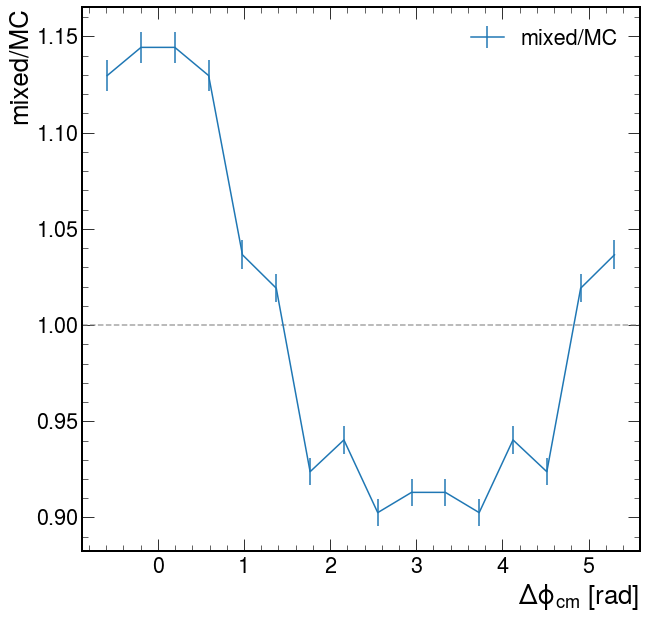

In [594]:
#only use standard mix and standard mc, take ratio
bins=8
for df in dfs_mc['D'],:
    for weighted in True,:
        df['h2_truth_p']=df.eval("sqrt((nu_truth*h2_truth_z)**2-.1396**2)")
        df['h1_truth_p']=df.eval("sqrt((nu_truth*h1_truth_z)**2-.1396**2)")
        cuts = "h1_truth_cm_pt>0.25 and h2_truth_cm_pt>0.25 and h2_truth_p>0.35"
        cuts += " and h1_truth_z>0.5 and h2_truth_z>0.05 and h2_truth_z<0.45"
        cuts += " and h1_truth_pid==211 and h2_truth_cm_pt< 99 and h1_pid==211"
        cuts += " and h2_truth_pid==-211 and h1_th>10 and h1_truth_pid==211"
        cuts += " and ((h2_truth_th>25 and h2_truth_p>0.7) or (h2_truth_p>0.5 & h2_truth_th>30) or (h2_truth_th>40))"
        cuts+=' and abs(h1_p-h1_truth_p)<h1_truth_p*.1'

        if "h2_p" not in df.columns:
            df['h2_p'] =df.eval("sqrt((nu*h2_z)**2-.1396**2)")

        #df.rename(columns={'h1_FidCut':'h1_FidCutPiPlus'}, inplace=True)
        #df.rename(columns={'h2_FidCut':'h2_FidCutPiPlus'}, inplace=True)

        #apply trigger cuts.
        df= R2h_module.applyCuts(df.query(cuts), nomCuts=True)


        denom,x = np.histogram(df.eval("abs(dphi_truth)"), bins=np.linspace(0, np.pi, 1+bins), weights=df.weight_truth if weighted else None)

        q_pass = "h2_pid==-211 and h2_z>0.05 and abs(h2_deltaZ)<3 and h2_FidCutPiPlus==1 and h2_cm_pt<99 and h2_cm_pt>0.25"
        q_pass += " and abs(h2_p-h2_truth_p)<h2_truth_p*.1 "
        
        dfpass = df.query(q_pass)
        num,x = np.histogram(dfpass.eval("abs(dphi_truth)"), bins=np.linspace(0, np.pi, 1+bins), weights=dfpass.weight_truth if weighted else None)
        eff=num/denom
        deff=np.sqrt((num)*(denom-num)/(denom**3))
        x=(x[:-1]+x[1:])/2
        y=eff/np.mean(eff)
        dy = deff/np.mean(eff)
        #y=flip(y)
        #dy=flip(dy)
        print(y, dy)
        rms = np.sqrt(sum((y-1)**2)/len(y))
        print("rms=",rms, "chi2=", sum((y-1)**2/(dy**2)))
        #plt.errorbar(x,y, dy, label='MC '+ ("weighted" if weighted else "unweighted"))  


pid=211;  pMin=0.35; pT1min=.25; pT2min=.25;
q = f"h1_pid=={pid}  and h2_z>0.05 and h2_z<0.45 and h1_cm_pt > {pT1min} and "+\
                 f"h2_cm_pt > {pT2min} and h1_z>0.5 and h2_pid=={-pid} and h2_p>{pMin}"
q +=     " and h2_th<90 and h1_z>0.5"
q +=" and ((h2_th>25 and h2_p>0.7) or (h2_p>0.5 and h2_th>30) or (h2_th>40)) and h1_th>10 "


for key in "xQ2",:
    df = dfs_mixed[key].query(q)
    N2mix, x = np.histogram(dfs_mixed[key].query(q)['dphi'], bins=bins, range=(0, np.pi))
    phi=(x[:-1]+x[1:])/2
    M = N2mix/(sum(N2mix)/len(N2mix))
    dMstat = np.sqrt(N2mix)/(sum(N2mix)/len(N2mix))
    print(len(flipx(phi)))
    plt.errorbar(flipx(phi),flip(M/y), flip(dMstat/y), label="mixed/MC")
    print("rms (M/MC)=", np.sqrt(np.sum((M/y-1)**2)/len(y)))

  

plt.legend()
plt.xlabel("$\Delta\phi_{\\rm cm}$ [rad]")
plt.ylabel("mixed/MC")
plt.axhline(1, color='0.5', alpha=0.7, linestyle='--')

Entries before cut  84599
Q2>1.0 and Q2<4.0 84599  (100.00  %)
0.2<h1_p<5.0  84599  (100.00  %)
inelasticity < 0.85 84599  (100.00  %)
h1_pid = pions (trigger) 84599  (100.00  %)
2.2 < nu <4.2 84599  (100.00  %)
10< h1_th 84599  (100.00  %)
Theta/P fiducial region selected for trigger hadron 84599  (100.00  %)
Nom cuts for the trigger applied 68688  (81.19  %)
[0.9968502  0.84742767 1.30355802 0.86072745 0.92623995 1.24149574
 0.79017981 1.03352116] [0.02167695 0.01802833 0.01157175 0.01089896 0.00920723 0.00765119
 0.00860781 0.00906495]
rms= 0.17454994721800235 chi2= 2591.3392786081167


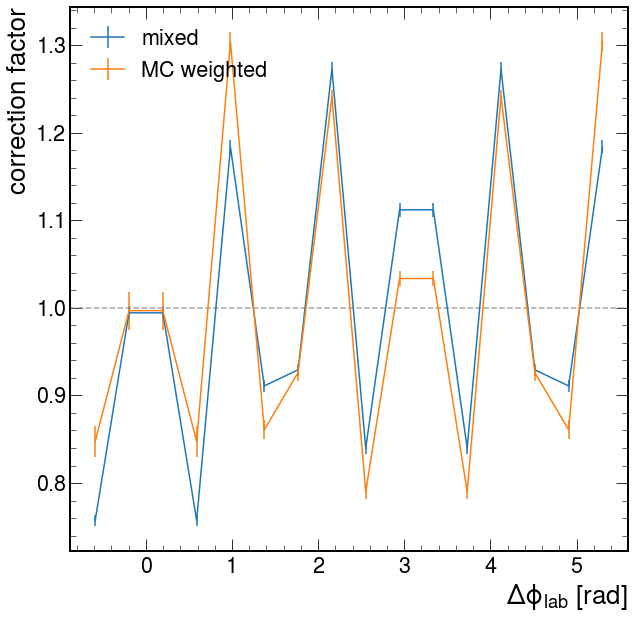

In [412]:
#lab frame
pid=211;  pMin=0.35; pT1min=.25; pT2min=.25;bins=8
q = f"h1_pid=={pid}  and h2_z>0.05 and h2_z<0.45 and h1_cm_pt > {pT1min} and "+\
                 f"h2_cm_pt > {pT2min} and h1_z>0.5 and h2_pid=={-pid} and h2_p>{pMin}"
q +=     " and h2_th<90 and h1_z>0.5"
q +=" and ((h2_th>25 and h2_p>0.7) or (h2_p>0.5 and h2_th>30) or (h2_th>40)) and h1_th>10 "



for key in "xQ2",:
    df = dfs_mixed[key].query(q)
    N2mix, x = np.histogram(dfs_mixed[key].query(q).eval('abs(diff_phi_lab)'), bins=bins, range=(0, np.pi))
    phi=(x[:-1]+x[1:])/2
    M = N2mix/(sum(N2mix)/len(N2mix))
    dMstat = np.sqrt(N2mix)/(sum(N2mix)/len(N2mix))
    plt.errorbar(flipx(phi),flip(M), flip(dMstat), label="mixed")

for df in dfs_mc['D'],:
    for weighted in True,:
        df['h2_truth_p']=df.eval("sqrt((nu_truth*h2_truth_z)**2-.1396**2)")
        cuts = "h1_truth_cm_pt>0.25 and h2_truth_cm_pt>0.25 and h2_truth_p>0.35"
        cuts += " and h1_truth_z>0.5 and h2_truth_z>0.05 and h2_truth_z<0.45"
        cuts += " and h1_pid==211 and h2_truth_cm_pt< 99"
        cuts += " and h2_truth_pid==-211 and h1_th>10 and h1_truth_pid==211"
        cuts += " and ((h2_truth_th>25 and h2_truth_p>0.7) or (h2_truth_p>0.5 & h2_truth_th>30) or (h2_truth_th>40))"
        #cuts='h1_cm_pt>0'

        if "h2_p" not in df.columns:
            df['h2_p'] =df.eval("sqrt((nu*h2_z)**2-.1396**2)")

        #df.rename(columns={'h1_FidCut':'h1_FidCutPiPlus'}, inplace=True)
        #df.rename(columns={'h2_FidCut':'h2_FidCutPiPlus'}, inplace=True)

        #apply trigger cuts.
        df= R2h_module.applyCuts(df.query(cuts), nomCuts=True)


        denom,x = np.histogram(df.eval("abs(dphi_lab_truth)"), bins=np.linspace(0, np.pi, 9), weights=df.weight_truth if weighted else None)

        q_pass = "h2_pid==-211 and h2_z>0.05 and abs(h2_deltaZ)<3 and h2_FidCutPiPlus==1 and h2_cm_pt<99 and h2_cm_pt>0.25"
        q_pass += " and abs(h2_p-h2_truth_p)<h2_truth_p*.1 and h2_p+h1_p<nu"
        
        dfpass = df.query(q_pass)
        num,x = np.histogram(dfpass.eval("abs(dphi_lab_truth)"), bins=np.linspace(0, np.pi, 9), weights=dfpass.weight_truth if weighted else None)
        eff=num/denom
        deff=np.sqrt((num)*(denom-num)/(denom**3))
        x=(x[:-1]+x[1:])/2
        y=eff/np.mean(eff)
        dy = deff/np.mean(eff)
        print(y, dy)
        rms = np.sqrt(sum((y-1)**2)/len(y))
        print("rms=",rms, "chi2=", sum((y-1)**2/(dy**2)))
        plt.errorbar(flipx(x),flip(y), flip(dy), label='MC '+ ("weighted" if weighted else "unweighted"))    

    plt.legend()
plt.ylabel("correction factor")
plt.axhline(1, color='0.5', alpha=0.7, linestyle='--')
plt.xlabel("$\Delta\phi_{\\rm lab}$ [rad]")
plt.show()

Entries before cut  84599
Q2>1.0 and Q2<4.0 84599  (100.00  %)
0.2<h1_p<5.0  84599  (100.00  %)
inelasticity < 0.85 84599  (100.00  %)
h1_pid = pions (trigger) 84599  (100.00  %)
2.2 < nu <4.2 84599  (100.00  %)
10< h1_th 84599  (100.00  %)
Theta/P fiducial region selected for trigger hadron 84599  (100.00  %)
Nom cuts for the trigger applied 68688  (81.19  %)
[0.9968502  0.84742767 1.30355802 0.86072745 0.92623995 1.24149574
 0.79017981 1.03352116] [0.02167695 0.01802833 0.01157175 0.01089896 0.00920723 0.00765119
 0.00860781 0.00906495]
rms= 0.17454994721800235 chi2= 2591.3392786081167
rms(M/MC)= 0.06480254346146104


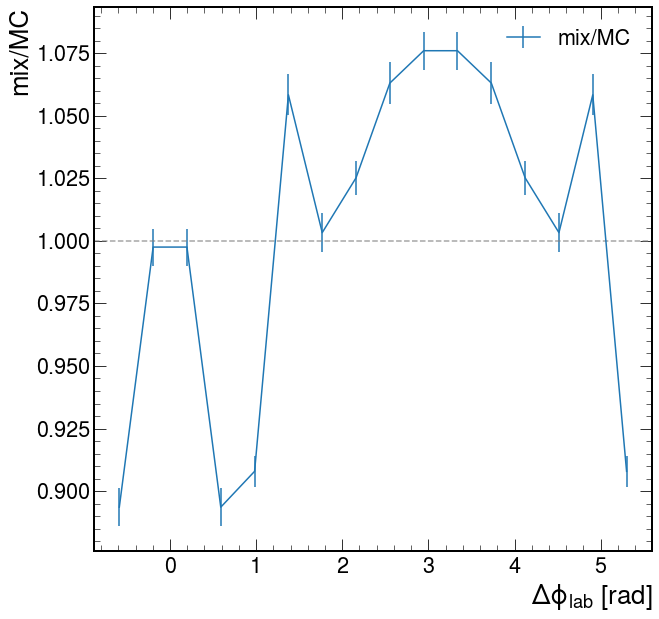

In [413]:
for df in dfs_mc['D'],:
    for weighted in True,:
        df['h2_truth_p']=df.eval("sqrt((nu_truth*h2_truth_z)**2-.1396**2)")
        cuts = "h1_truth_cm_pt>0.25 and h2_truth_cm_pt>0.25 and h2_truth_p>0.35"
        cuts += " and h1_truth_z>0.5 and h2_truth_z>0.05 and h2_truth_z<0.45"
        cuts += " and h1_pid==211 and h2_truth_cm_pt< 99"
        cuts += " and h2_truth_pid==-211 and h1_th>10 and h1_truth_pid==211"
        cuts += " and ((h2_truth_th>25 and h2_truth_p>0.7) or (h2_truth_p>0.5 & h2_truth_th>30) or (h2_truth_th>40))"
        #cuts='h1_cm_pt>0'

        if "h2_p" not in df.columns:
            df['h2_p'] =df.eval("sqrt((nu*h2_z)**2-.1396**2)")

        #df.rename(columns={'h1_FidCut':'h1_FidCutPiPlus'}, inplace=True)
        #df.rename(columns={'h2_FidCut':'h2_FidCutPiPlus'}, inplace=True)

        #apply trigger cuts.
        df= R2h_module.applyCuts(df.query(cuts), nomCuts=True)


        denom,x = np.histogram(df.eval("abs(dphi_lab_truth)"), bins=np.linspace(0, np.pi, 9), weights=df.weight_truth if weighted else None)

        q_pass = "h2_pid==-211 and h2_z>0.05 and abs(h2_deltaZ)<3 and h2_FidCutPiPlus==1 and h2_cm_pt<99 and h2_cm_pt>0.25"
        q_pass += " and abs(h2_p-h2_truth_p)<h2_truth_p*.1 and h2_p+h1_p<nu"
        
        dfpass = df.query(q_pass)
        num,x = np.histogram(dfpass.eval("abs(dphi_lab_truth)"), bins=np.linspace(0, np.pi, 9), weights=dfpass.weight_truth if weighted else None)
        eff=num/denom
        deff=np.sqrt((num)*(denom-num)/(denom**3))
        x=(x[:-1]+x[1:])/2
        y=eff/np.mean(eff)
        dy = deff/np.mean(eff)
        print(y, dy)
        rms = np.sqrt(sum((y-1)**2)/len(y))
        print("rms=",rms, "chi2=", sum((y-1)**2/(dy**2)))
        #plt.errorbar(x,y, dy, label='MC '+ ("weighted" if weighted else "unweighted"))    




pid=211;  pMin=0.35; pT1min=.25; pT2min=.25;bins=8
q = f"h1_pid=={pid}  and h2_z>0.05 and h2_z<0.45 and h1_cm_pt > {pT1min} and "+\
                 f"h2_cm_pt > {pT2min} and h1_z>0.5 and h2_pid=={-pid} and h2_p>{pMin}"
q +=     " and h2_th<90 and h1_z>0.5"
q +=" and ((h2_th>25 and h2_p>0.7) or (h2_p>0.5 and h2_th>30) or (h2_th>40)) and h1_th>10 "


for key in "xQ2",:
    
    df = dfs_mixed[key].query(q)
    N2mix, x = np.histogram(dfs_mixed[key].query(q).eval('abs(diff_phi_lab)'), bins=bins, range=(0, np.pi))
    phi=(x[:-1]+x[1:])/2
    M = N2mix/(sum(N2mix)/len(N2mix))
    dMstat = np.sqrt(N2mix)/(sum(N2mix)/len(N2mix))
    plt.errorbar(flipx(phi),flip(M/y), flip(dMstat/y), label="mix/MC")
    rms = np.sqrt(sum((M/y-1)**2)/len(M))
    print("rms(M/MC)=", rms)
plt.legend()
plt.ylabel("mix/MC")
plt.axhline(1, color='0.5', alpha=0.7, linestyle='--')
plt.xlabel("$\Delta\phi_{\\rm lab}$ [rad]")
plt.show()

In [340]:
[name for name in dfpass.columns if "phi" in name ]

['dphi', 'dphi_lab', 'dphi_truth', 'dphi_lab_truth', 'diff_phi_cm']

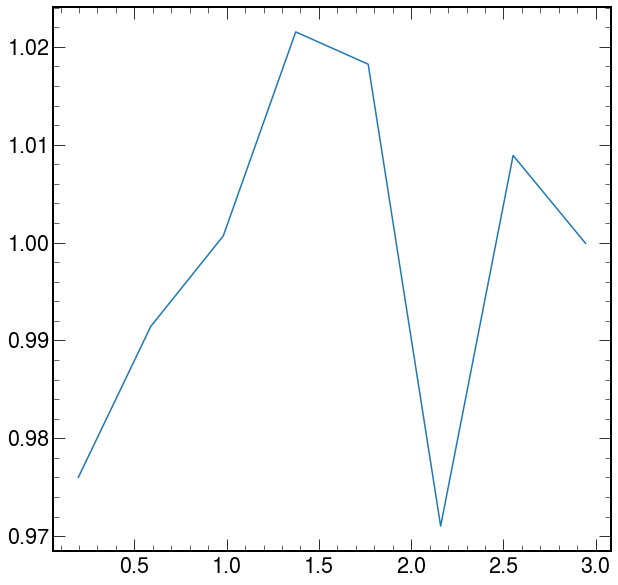

In [368]:
cuts = "h1_truth_cm_pt>0.25 and h2_truth_cm_pt>0.25 and h2_truth_p>0.35 and h1_pid==211"
n, x = plt.np.histogram(dfs_mc['D'].query(cuts).query("h2_z>0.05").dphi_truth, bins=8,density=True)
d, x = plt.np.histogram(dfs_mc['D'].query(cuts).dphi_truth, bins=8, density=True)
plt.plot((x[:-1]+x[1:])/2,n/d)

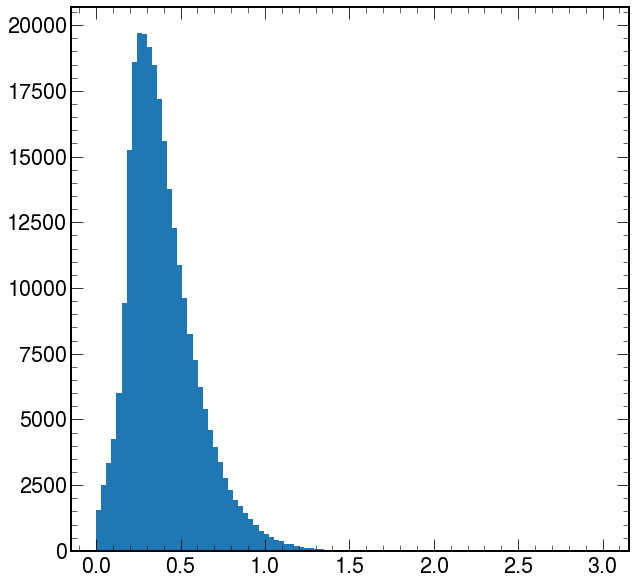

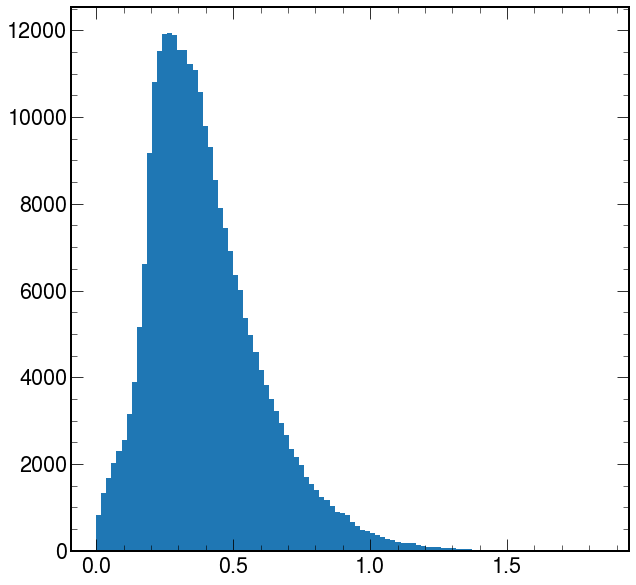

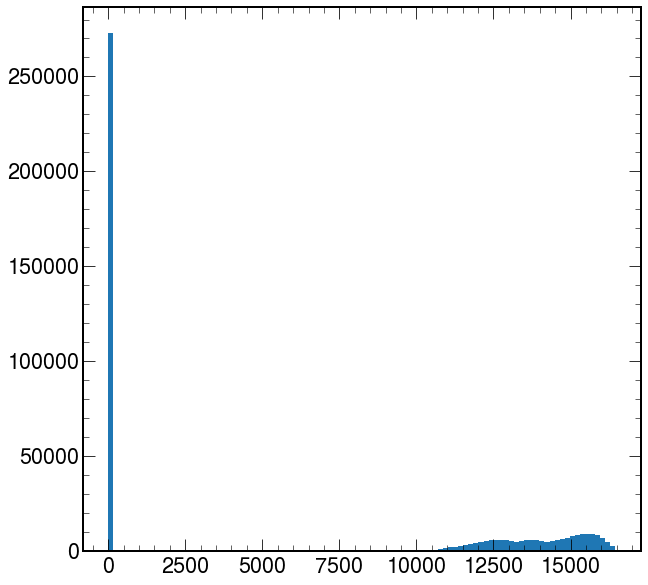

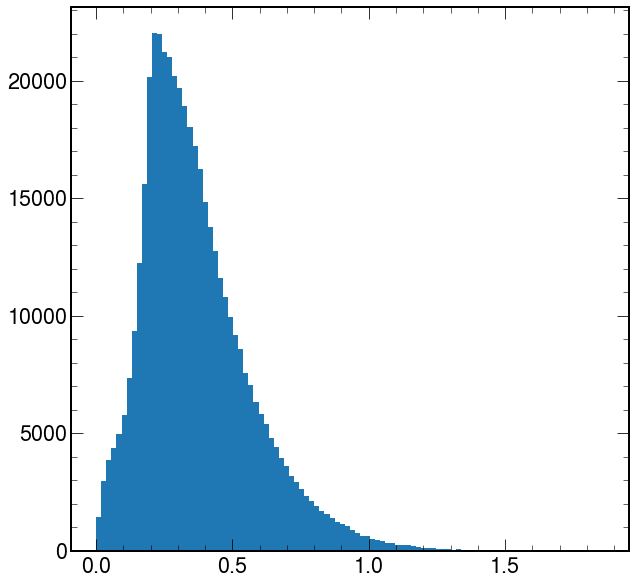

In [300]:
plt.hist(dfs_mc['D'].query("h2_z>0").eval("h2_cm_pt"),bins=100)
plt.show()
plt.hist(dfs_mc['D'].query("h2_z>0").eval("h2_truth_cm_pt"),bins=100)
plt.show()

plt.hist(dfs_mc['D'].eval("h2_cm_pt"),bins=100)
plt.show()
plt.hist(dfs_mc['D'].eval("h2_truth_cm_pt"),bins=100)
plt.show()

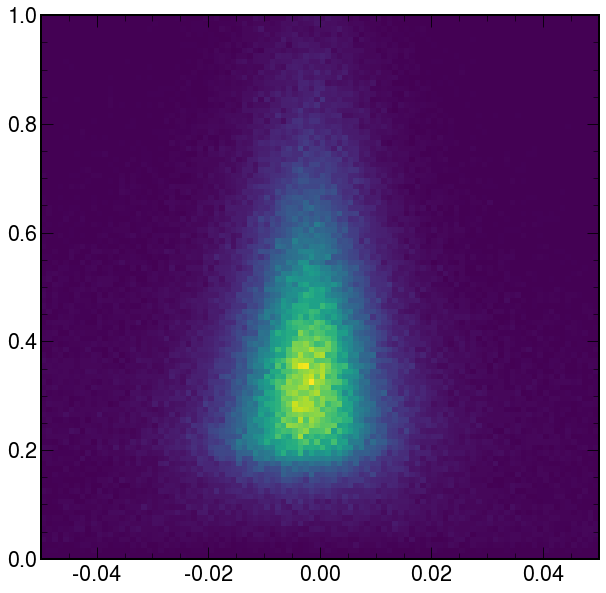

In [307]:
plt.hist2d(dfs_mc['D'].query("h2_z>0").eval("h2_cm_pt")/dfs_mc['D'].query("h2_z>0").eval("h2_truth_cm_pt")-1, 
         dfs_mc['D'].query("h2_z>0").eval("h2_truth_cm_pt"),  bins=100, range=((-.05,.05),(0,1)))
plt.show()

Entries before cut  130470
Q2>1.0 and Q2<4.0 130470  (100.00  %)
0.2<h1_p<5.0  130470  (100.00  %)
inelasticity < 0.85 130470  (100.00  %)
h1_pid = pions (trigger) 130470  (100.00  %)
2.2 < nu <4.2 130470  (100.00  %)
10< h1_th 130470  (100.00  %)
Theta/P fiducial region selected for trigger hadron 130470  (100.00  %)
Nom cuts for the trigger applied 111417  (85.40  %)


(array([37864.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0., 73553.]),
 array([-211.  , -206.78, -202.56, -198.34, -194.12, -189.9 , -185.68,
        -181.46, -177.2

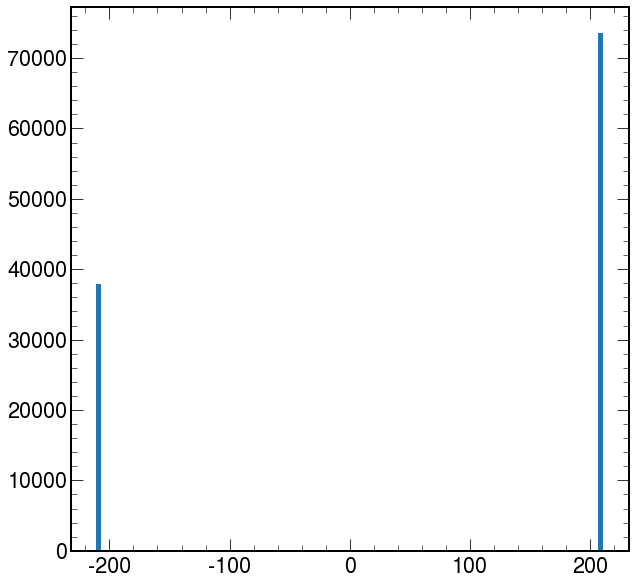

In [226]:
df = dfs_mc[f'D']
weighted=True
cuts = "h1_cm_pt>0.25 and h2_truth_cm_pt>0.25 and sqrt((nu_truth*h2_truth_z)**2-.1396**2)>0.35"
cuts += " and h1_z>0.5 and h2_truth_z>0.05 and h2_truth_z<0.45"
#cuts += " and h1_pid==211"
#cuts += " and h1_pid==211 and h2_truth_pid==-211 and h1_th>10 and h1_truth_pid==211"
#cuts += " and ((h2_truth_th>25 and sqrt((nu_truth*h2_truth_z)**2-.1396**2)>0.7) or (sqrt((nu_truth*h2_truth_z)**2-.1396**2)>0.5 & h2_truth_th>30) or (h2_truth_th>40))"
#cuts='h1_cm_pt>0'
df= R2h_module.applyCuts(df.query(cuts), nomCuts=True)
plt.hist(df.h1_pid, bins=100)

In [227]:
print(list(df.columns))

['dphi', 'dphi_lab', 'drap', 'h1_z', 'h2_z', 'h1_cm_pt', 'h2_cm_pt', 'h1_xf', 'h2_xf', 'h1_rap', 'ycm', 'h2_rap', 'h1_pid', 'h2_pid', 'h1_cm_ph', 'h2_cm_ph', 'h1_cm_th', 'h2_cm_th', 'pair_mass', 'pair_pt', 'mx_eh1h2x', 'mx_eh1x', 'mx_eh2x', 't', 'Q2', 'nu', 'W', 'e_px', 'e_py', 'e_pz', 'e_p', 'e_ph', 'e_th', 'SampFracEl25', 'SampFracEl20', 'TargTypeSM', 'TargType', 'x', 'u', 'h1_ph', 'h1_th', 'h2_ph', 'h2_th', 'h1_deltaZ', 'h2_deltaZ', 'h1_Nphe', 'h2_Nphe', 'h1_Sector', 'h2_Sector', 'h1_FidCutPiPlus', 'h2_FidCutPiPlus', 'h1_FidCutPiPlus', 'h2_FidCutPiPlus', 'h1_Chi2CC', 'h2_Chi2CC', 'h1_StatCC', 'h2_StatCC', 'h1_Betta', 'h2_Betta', 'h1_T4', 'h2_T4', 'evnt', 'pass_recon', 'dphi_truth', 'dphi_lab_truth', 'drap_truth', 'h1_truth_z', 'h2_truth_z', 'h1_truth_cm_pt', 'h2_truth_cm_pt', 'h1_truth_xf', 'h2_truth_xf', 'h1_truth_rap', 'ycm_truth', 'h2_truth_rap', 'h1_truth_pid', 'h2_truth_pid', 'h1_truth_cm_ph', 'h2_truth_cm_ph', 'h1_truth_cm_th', 'h2_truth_cm_th', 'pair_mass_truth', 'pair_pt_tru

(array([73553.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0., 37864.]),
 array([-211.  , -206.78, -202.56, -198.34, -194.12, -189.9 , -185.68,
        -181.46, -177.2

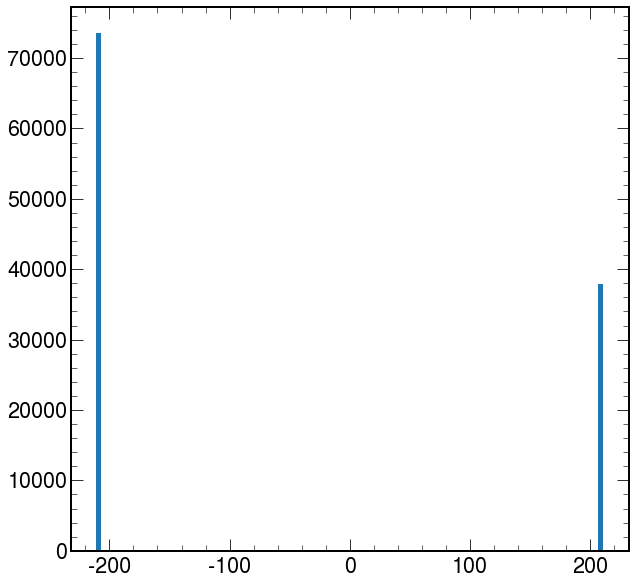

In [228]:
plt.hist(df.h2_truth_pid, bins=100)

In [429]:
plt.hist(dfs_mixed['no_ecuts'].diff_q_th, bins=100)

AttributeError: 'DataFrame' object has no attribute 'diff_q_th'

In [414]:
list(dfs_mixed["xQ2"].columns)

['E',
 'mixevt_E',
 'e_p',
 'mixevt_e_p',
 'e_th',
 'mixevt_e_th',
 'e_ph',
 'mixevt_e_ph',
 'h1_pid',
 'h2_pid',
 'h1_xf',
 'h2_xf',
 'h1_xf_default',
 'h2_xf_default',
 'h1_z',
 'h2_z',
 'h1_cm_pt',
 'h2_cm_pt',
 'h1_rap',
 'h2_rap',
 'h1_cm_rap',
 'h2_cm_rap',
 'Q2',
 'mixevt_Q2',
 'x',
 'mixevt_x',
 'nu',
 'mixevt_nu',
 'W',
 'mixevt_W',
 'h1_cm_ph',
 'h2_cm_ph',
 'h1_cm_th',
 'TargType',
 'missing_mass',
 'h1_ph',
 'h2_ph',
 'h1_th',
 'h2_th',
 'h1_p',
 'h2_p',
 'h1_deltaZ',
 'h2_deltaZ',
 'h1_Nphe',
 'h2_Nphe',
 'h1_Sector',
 'h2_Sector',
 'h1_FidCutPiPlus',
 'h2_FidCutPiPlus',
 'h1_Chi2CC',
 'h2_Chi2CC',
 'h1_StatCC',
 'h2_StatCC',
 'SampFracEl25',
 'SampFracEl20',
 'z',
 'e_px',
 'mixevt_e_px',
 'e_py',
 'mixevt_e_py',
 'e_pz',
 'mixevt_e_pz',
 'y',
 'mixevt_y',
 'h1_px',
 'h2_px',
 'h1_py',
 'h2_py',
 'h1_pz',
 'h2_pz',
 'q_th',
 'mixevt_q_th',
 'mixevt_nskipped',
 'diff_phi_cm',
 'diff_phi_lab',
 'diff_rap_cm',
 'mx_eh1x',
 'mx_eh2x',
 'mx_eh1h2x',
 'pair_mass',
 'h2_cm_zeta'

(array([35061., 45115., 57199., 46383., 35422., 34091., 23523., 11846.,
         8696.,  3538.]),
 array([1.02270013e-02, 5.81771066e+00, 1.16251943e+01, 1.74326780e+01,
        2.32401616e+01, 2.90476453e+01, 3.48551290e+01, 4.06626126e+01,
        4.64700963e+01, 5.22775799e+01, 5.80850636e+01]),
 <BarContainer object of 10 artists>)

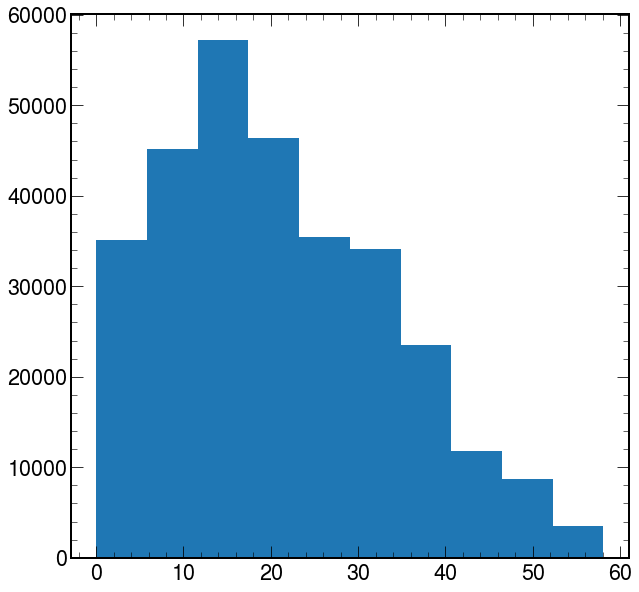

In [434]:
plt.hist(dfs_mixed['no_ecuts'].eval("180/3.14159*sqrt((q_th-mixevt_q_th)**2+(q_th*mixevt_diff_e_ph)**2)"))

In [646]:
df = root_pandas.read_root("/data/sebouh/eg2/python/out_D_C.root")

In [645]:
df=df.query(r2h.trigger_cut_nom.replace("h1", "h").replace("FidCutPiPlus", "FidCut"))

In [ ]:
pid=211;  pMin=0.35; pT1min=.25; pT2min=.25;
q = f"h1_pid=={pid}  and h2_z>0.05 and h2_z<0.45 and h1_cm_pt > {pT1min} and "+\
                 f"h2_cm_pt > {pT2min} and h1_z>0.5 and h2_pid=={-pid} and h2_p>{pMin}"
q +=     " and h2_th<90 and h1_z>0.5"
q +=" and ((h2_th>25 and h2_p>0.7) or (h2_p>0.5 and h2_th>30) or (h2_th>40)) and h1_th>10 "

df=df.query(q.replace)